# Prueba 2

# 1. Preliminares

## 1.1 Descripción del Problema

* Se desea poder generar modelos predictivos para generar prediciones acerca de la ocurrencia de detenciones y si hubo violencia utilizada en distintos procedimientos policiales realizados por la polícia de New York.

## 1.2 Objetivos

1. Generar un modelo que prediga si el procedimiento policial concluirá en un arresto o no, condicional a las características medidas del sospechoso.
2. Generar un modelo predictivo que permita determinar si el procedimiento policial concluíra en alguna acción violenta.

## 1.3 Implementación

* 1 - Leemos con pd.read ambos DataFrame que se nos entregan, asignandolos a los objetos (df_train y df_test).
* 2 - Preprocesamos (df_train y df_test) con la función que se nos entregó (create_suitable_dataframe), para igualar el benchmark de los atributos.
* 3 - Una vez preprocesadas ambas bases, visualizamos con "shape" el Q de atributos que nos quedan en (df_train y df_test), verificamos si estas coinciden o no,  y eliminamos los atributos que no esten presentes en ambos df, dejando asi solo atributos unicos.
* 4 - agregaremos una nueva columna que llamaremos "sample" a cada base (df_train y df_test) para identificar a que base corresponde el registro.
* 5 - Uniremos ambos DataFrame (train y test) con pd.concat para asi quedarnos con una unica base que incluya ambos df.
* 6 - Eliminaremos aquellos atributos categoricos que su distribucion sea en su clase mayoritaria mayor a 95%
* 7 - Identificamos el primer vector objetivo bajo el nombre de "arstmade" el cual nos indicara si se produjo un arresto o no
* 8 - Crearemos un segundo vector objetivo bajo el nombre de "violent" a partir de atributos existentes que indican el tipo de violencia, utilizando para ello los atributos ('pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other'), este nuevo vector objetivo nos ayudará a identificar si el procedimiento policial concluirá en alguna acción violenta.
* 9 - Recodificaremos todas las variables categoricas, como también los vectores objetivos 1 y 2, eliminando posterior a la recodificación los atributos ('pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other') .
* 10 - Una vez que tenemos la base limpia y lista para trabajar, utilizaremos la columna "sample" para identificar a que tipo corresponde el registro y separaremos la base en 2 (df_train y df_test)
* 11 - Utilizaremos la base df_train para implementar los 5 modelos
* 12 - utilizaremos la base df_test para obtener las probabilidades solicitadas.

## 1.4 Criterios de optimización y métricas de desempeño

Para evaluar los modelos de clasificación se utilizarán principalmente las siguientes métricas:
* __Precision__: exactitud del modelo para predecir una clase, en porcentaje.
* __Recall__: capacidad del modelo de recordar las etiquetas reales, en porcentaje.
* __F1__: promedio entre precision y recall, que penaliza diferencias entre las métricas
* __ROC_AUC__ (valor del área bajo la curva ROC): métrica que captura las distintas combinaciones de TPR Y FPR posibles de alcznar, resumiendo en un valor que va de 0 a 1 la capacidad del modelo en predecir las etiquetas correctamente. 

# 2. Aspectos Computacionales

In [1]:
# Numpy: librería escencial para procesos matemáticos utilizados en data science
import numpy as np
# Pandas: librería para la creación y manipulación de estructura de datos
import pandas as pd
# Matplotlib: librería basada en Matlab, utilizada para realizar gráficos en 2D
import matplotlib.pyplot as plt
# Seaborn: librería avanzada para gráficos
import seaborn as sns
# Función para visualizar de forma gráfica los valores perdidos
from missingno import matrix
# Importación de funciones creadas 
import funciones as fn

# Función para preprocesar la base
from preproc_nyc_sqf import create_suitable_dataframe
# Métricas de clasificación, que incluye precision, recall, f1, 
# accuracy, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Clase para realizar busqueda de grilla con validación cruzada y estratificación de la muestra
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Objeto para instanciar Support Vector Machine 
from sklearn.svm import SVC
# Objeto para instanciar Random Forest
from sklearn.ensemble import RandomForestClassifier
# Objeto para instanciar Gradient Boosting, Random Forest
from xgboost import XGBClassifier, XGBRFClassifier
# Objeto para instanciar Naive Bayes
from sklearn.naive_bayes import BernoulliNB
# Objeto para instanciar  Regresión Logística
from sklearn.linear_model import LogisticRegression
# Función para gráficas dependencias parciales
from sklearn.inspection import plot_partial_dependence

In [2]:
# Estilo de gráficos
plt.style.use('ggplot')

In [3]:
# Importación de bases de entrenamiento y prueba
raw_train = pd.read_csv('2009_1perc.csv')
raw_test = pd.read_csv('2010_1perc.csv')
# Preproceso de las bases con función igual el benchmark de los atributos
df_train, _, _ = create_suitable_dataframe(raw_train)
df_test, _, _ = create_suitable_dataframe(raw_test)
print('Dimensiones del df_train inicial: {}'.format(df_train.shape))
print('Dimensiones del df_test inicial: {}'.format(df_test.shape))

# Homologar cantidad de atriutos entre ambos dataframes
df_train = df_train.drop(columns=(set(df_train.columns) - set(df_test.columns)))
df_test = df_test.drop(columns=(set(df_test.columns) - set(df_train.columns)))
print('Dimensiones del df_train final: {}'.format(df_train.shape))
print('Dimensiones del df_test final: {}'.format(df_test.shape))

['Unnamed: 0', 'year', 'pct', 'ser_num', 'datestop', 'timestop', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'addrpct', 'linecm', 'detailcm', 'perobs']
['Unnamed: 0', 'year', 'pct', 'ser_num', 'datestop', 'timestop', 'perobs', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight']
Dimensiones del df_train inicial: (4636, 74)
Dimensiones del df_test inicial: (4747, 77)
Dimensiones del df_train final: (4636, 72)
Dimensiones del df_test final: (4747, 72)


In [4]:
# Uníon de ambos dataframe
df_train['sample'] = 'train'
df_test['sample'] = 'test'

df = pd.concat([df_train, df_test], ignore_index=True)
print('Dimensiones del dataframe final: {}'.format(df.shape))

Dimensiones del dataframe final: (9383, 73)


# 3. Análisis Exploratorio

## 3.1 Análisis de tipo de datos y valores perdidos

In [5]:
# Exploración de features y el tipo de datos correspondientes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 73 columns):
recstat     9383 non-null object
inout       9383 non-null object
trhsloc     9383 non-null object
typeofid    9383 non-null object
explnstp    9383 non-null object
othpers     9383 non-null object
arstmade    9383 non-null object
sumissue    9383 non-null object
offunif     9383 non-null object
officrid    9383 non-null object
frisked     9383 non-null object
searched    9383 non-null object
contrabn    9383 non-null object
pistol      9383 non-null object
riflshot    9383 non-null object
knifcuti    9383 non-null object
othrweap    9383 non-null object
pf_hands    9383 non-null object
pf_wall     9383 non-null object
pf_grnd     9383 non-null object
pf_drwep    9383 non-null object
pf_ptwep    9383 non-null object
pf_baton    9383 non-null object
pf_hcuff    9383 non-null object
pf_pepsp    9383 non-null object
pf_other    9383 non-null object
radio       9383 non-null object
ac

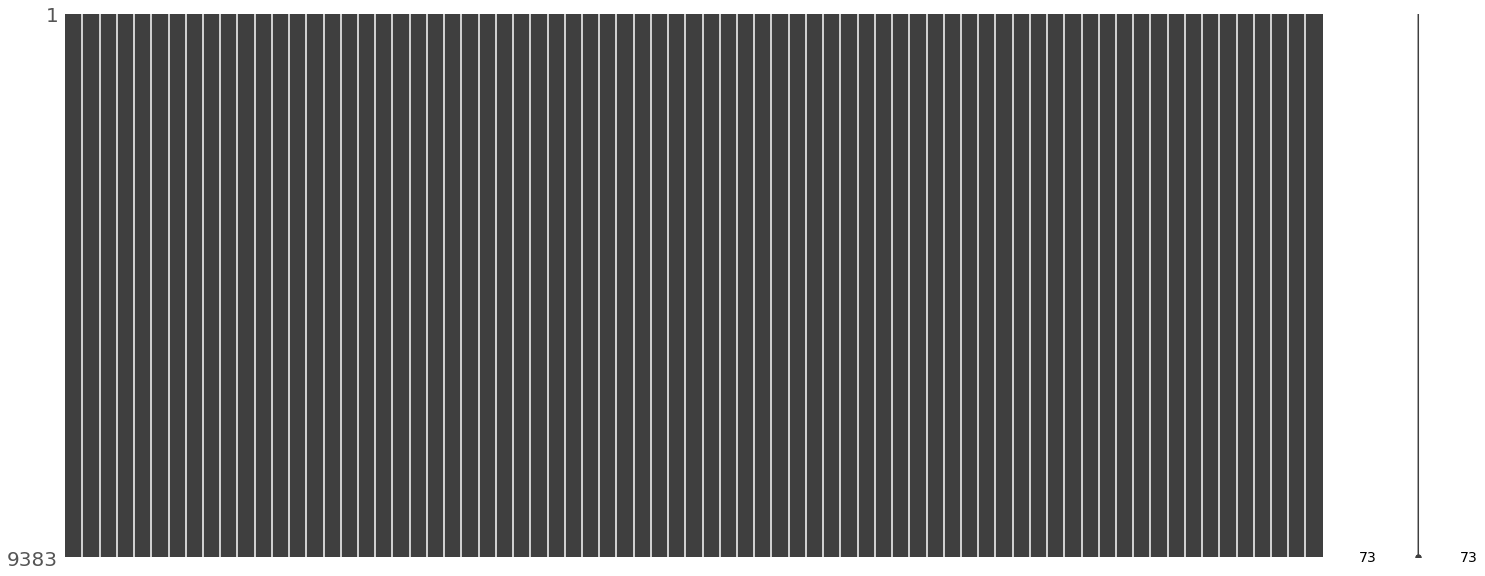

In [6]:
# Visión general de datos perdidos
matrix(df)

__Comentario__: Se puede observar del siguiente gráfico que no existen datos con valores perdidos.

## 3.2 Análisis Univariado

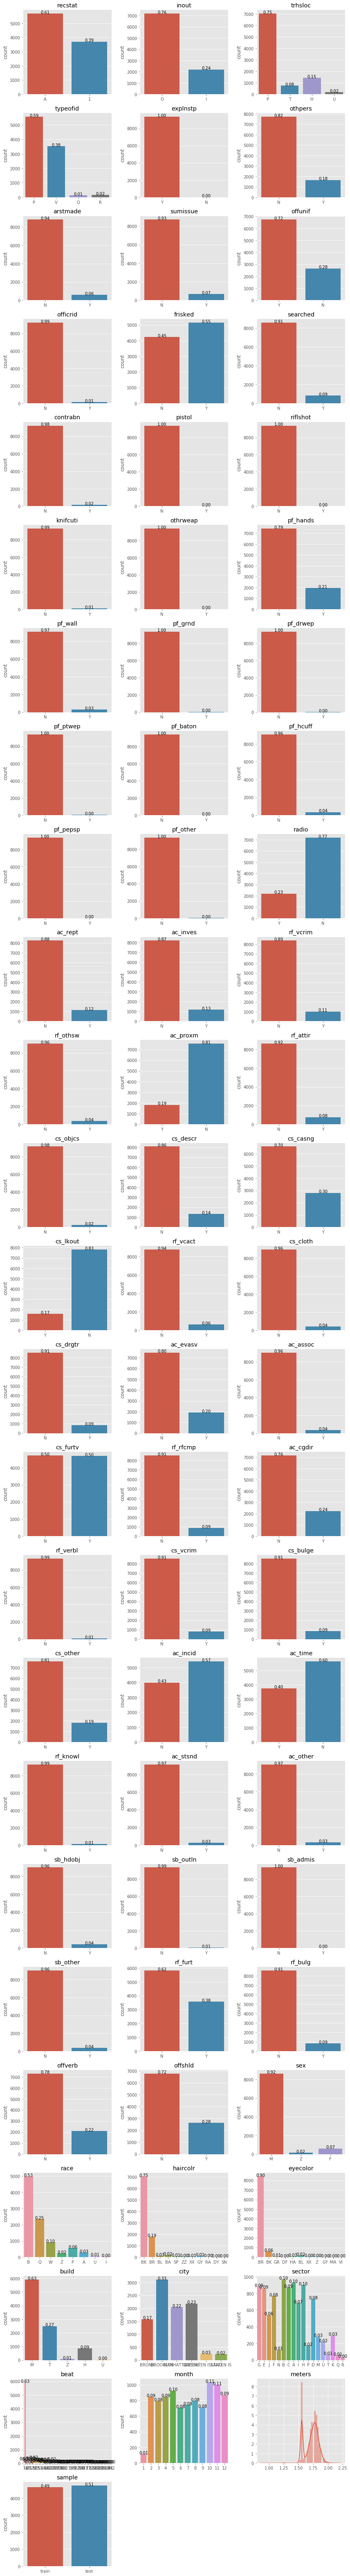

In [7]:
fn.distribution_plots(df)

__Comentario:__ Se observa que el vector objetivo 'arstmade' es una clase binaria (hubo arresto o no) cuya distribución se encuentra altamente desbalanceada, con solo un 6% de casos donde hubo efectivamente un arresto. Además, se es evidente la abundancia de variables categóricas con clases binarias, con varias de ellas con clases altamente desbalanceadas.

In [8]:
# Correción error en la base
df = df.replace('STATEN IS', 'STATEN ISLAND')

# 4. Feature Engineering

N    7147
Y    2236
Name: violent, dtype: int64


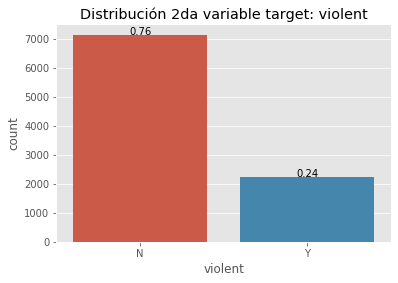

In [9]:
# Creación 2do vector objetivo 
df['violent'] = 'N'
for i, row in df.iterrows():
    if (row['pf_hands'] == 'Y') | (row['pf_wall'] == 'Y') | (
        row['pf_grnd'] == 'Y') | (row['pf_drwep'] == 'Y') | (
        row['pf_baton'] == 'Y') | (row['pf_hcuff'] == 'Y') | (
        row['pf_pepsp'] == 'Y') | (row['pf_other'] == 'Y'):

        df.loc[i, 'violent'] = 'Y'
        

# Distribución de la nueva variable       
print (df['violent'].value_counts())

# Gráfico de distribción nueva variable objetivo
ax = sns.countplot(df['violent'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .5,
        '{:1.2f}'.format(height/len(df['violent'])), ha="center")
plt.title('Distribución 2da variable target: violent')
plt.show()

__Comentario:__ Se observa que al igual que el primer target, 'violent' también presenta clases desbalanceadas, siendo relativamente pocos los casos donde ocurren actuar violentos en los procedimientos policiales

In [10]:
# Preprocesamiento de la base
num_cols = ['meters']
obj_cols = [i for i in df.drop(columns=['sample', 'violent']).select_dtypes('object').columns]
exclude = ['month', 'sample']
outliers_cols = None
target = 'arstmade'

X_train, X_test, y_train, y_test = fn.pre_processing(df.drop(columns='violent'), num_cols, obj_cols, exclude, 
                                                     outliers_cols, target,remove_outliers=False, 
                                                     one_hot=True, std_scaler=False, 
                                                     drop_nan=False, custom_split=True)

__Comentario:__ La estrategia de recodificación de las variables categóricas consiste en aplicar la clase 'ordinal encoder' a todas las columnas clasificadas como 'object' a excepción de 'sample', dado que esta variable se es usada dentro de la función de pre-proceso para la separar las muestras de entrenamiento y validación.

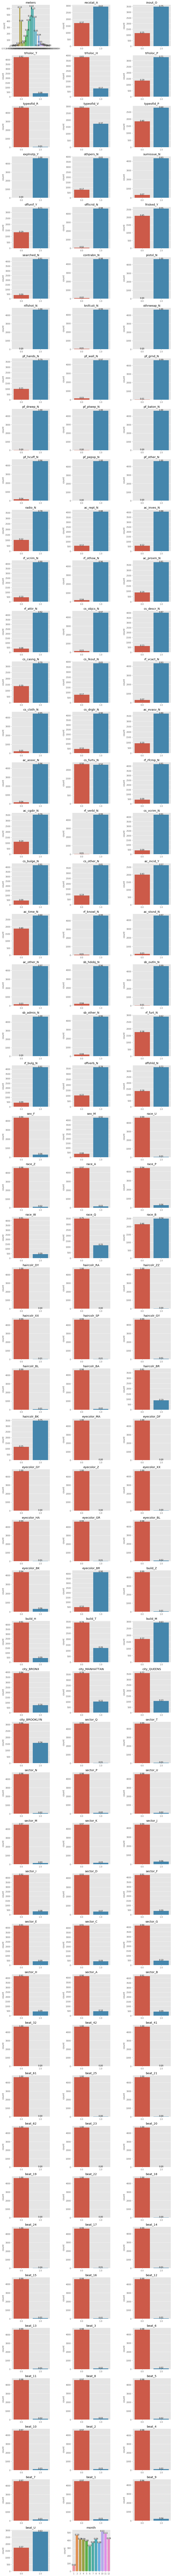

In [11]:
# Distribución de X_train
fn.distribution_plots(X_train)

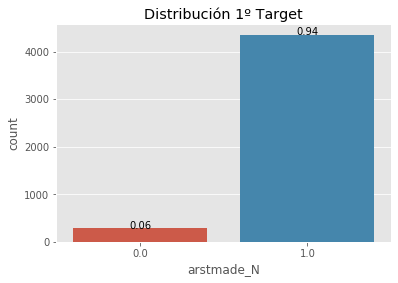

In [12]:
# Distribución de 1º Target
ax = sns.countplot(y_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .5,
        '{:1.2f}'.format(height/len(y_train)), ha="center")
plt.title('Distribución 1º Target')
plt.show()

# 5. Modelamiento

## 5.1 Modelo predictivo que condicional a las características medidas del sospechoso

### 5.1.1 XGBoost

In [13]:
# Estratificación de la muestra
strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
# Aegurar tipo de dato para entrenar y modelos modelos
X_train = X_train.astype('int')
y_train = y_train.astype('int')
X_test = X_test.astype('int')
y_test = y_test.astype('int')

In [14]:
break

SyntaxError: 'break' outside loop (<ipython-input-14-6aaf1f276005>, line 4)

In [18]:
# Modelos y grillas de parámetros tentativos

# XGBoost
xgboost = XGBClassifier(n_jobs=-1)
param_grid_xgb = {'learning_rate': np.arange(.10, .13, .005), 
                  'max_depth': [3, 4, 5, 6], 
                  'n_estimators': [50, 60, 70, 80]}

grid_xgb = GridSearchCV(xgboost, param_grid_xgb, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_xgb, X_train, y_train, X_test, y_test)

{'learning_rate': 0.11000000000000001, 'max_depth': 4, 'n_estimators': 70}
ROC_Score:
0.81
Confusion_Matrix:
[[ 194  115]
 [  35 4403]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       309
           1       0.97      0.99      0.98      4438

    accuracy                           0.97      4747
   macro avg       0.91      0.81      0.85      4747
weighted avg       0.97      0.97      0.97      4747

Realizado en 216.917s


### 5.1.2 Random Forest

In [26]:
# Random Forest
forest_clf = RandomForestClassifier(random_state=1234)
param_grid_rf = {'n_estimators': [500, 600, 700], 
                  'max_depth': [5, 9, 12, 13],
                  'oob_score': [True]}
grid_rf = GridSearchCV(forest_clf, param_grid_rf, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_rf, X_train, y_train, X_test, y_test)

{'max_depth': 12, 'n_estimators': 600, 'oob_score': True}
ROC_Score:
0.771
Confusion_Matrix:
[[ 169  140]
 [  22 4416]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.88      0.55      0.68       309
           1       0.97      1.00      0.98      4438

    accuracy                           0.97      4747
   macro avg       0.93      0.77      0.83      4747
weighted avg       0.96      0.97      0.96      4747

Realizado en 42.150s


### 5.1.3 Support Vector Machine

In [22]:
# Support Vector Machine
svc = SVC(random_state=123)
param_grid_svm = {'kernel': ['rbf', 'linear'],
             'C': [.2, .25, .3, .35, .5, .7, 1], 
              'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(svc, param_grid_svm, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_svm, X_train, y_train, X_test, y_test)

{'C': 0.35, 'gamma': 'scale', 'kernel': 'linear'}
ROC_Score:
0.797
Confusion_Matrix:
[[ 186  123]
 [  38 4400]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       309
           1       0.97      0.99      0.98      4438

    accuracy                           0.97      4747
   macro avg       0.90      0.80      0.84      4747
weighted avg       0.96      0.97      0.96      4747

Realizado en 19.552s


### 5.1.4 Logistic Regression

In [23]:
# Logistic Regression
log = LogisticRegression(random_state=123)
param_grid_log = {'C': [.5, .7, 1, 1.5, 2], 'penalty': ['l2', 'l1', 'elasticnet']}
grid_log = GridSearchCV(log, param_grid_log, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_log, X_train, y_train, X_test, y_test)

{'C': 2, 'penalty': 'l2'}
ROC_Score:
0.782
Confusion_Matrix:
[[ 177  132]
 [  36 4402]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.83      0.57      0.68       309
           1       0.97      0.99      0.98      4438

    accuracy                           0.96      4747
   macro avg       0.90      0.78      0.83      4747
weighted avg       0.96      0.96      0.96      4747

Realizado en 1.168s


/Users/fernando/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 5.1.5 Naive Bayes

In [15]:
# Naive Bayes
naive_bayes = BernoulliNB()
param_grid_nb = {'alpha': [0, .1, .2,.4,.6, 1], 'fit_prior':[True, False]}
grid_nb = GridSearchCV(naive_bayes, param_grid_nb, n_jobs=-1, cv=strat)

fn.clf_metrics(grid_nb, X_train, y_train, X_test, y_test)

{'alpha': 1, 'fit_prior': True}
ROC_Score:
0.835
Confusion_Matrix:
[[ 215   94]
 [ 115 4323]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       309
           1       0.98      0.97      0.98      4438

    accuracy                           0.96      4747
   macro avg       0.82      0.83      0.82      4747
weighted avg       0.96      0.96      0.96      4747

Realizado en 2.167s


### 5.1.6 Refinación atributos mejor modelo

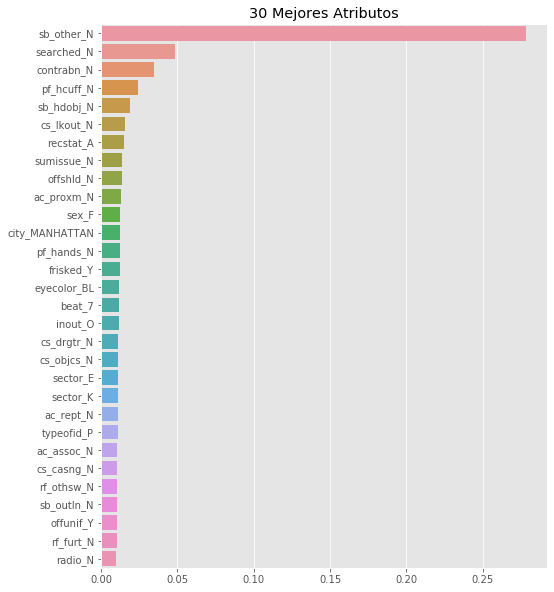

In [27]:
# 30 Mejores parámetros
f_import = grid_xgb.best_estimator_.feature_importances_
best_params = pd.Series(data=f_import, index=X_train.columns).sort_values(ascending=False)[:30]
plt.figure(figsize=(8,10))
sns.barplot(x=best_params.values, y=best_params.index)
plt.title('30 Mejores Atributos')
plt.show()

In [29]:
# Bussklearn.naive_bayesla de hiperparámetros para modelo con mejores 30 (+2) features
xgboost = XGBClassifier(n_jobs=-1)
param_grid_xgb_best = {'learning_rate': np.arange(.10, .13, .005), 
                  'max_depth': [2, 3, 4, 6], 
                  'n_estimators': [40, 50, 70, 80]}
X_train_best = X_train[best_params.index]
X_test_best = X_test[best_params.index]

grid_xgb = GridSearchCV(xgboost, param_grid_xgb_best, n_jobs=-1, cv=strat)
# Reporte de métricas
fn.clf_metrics(grid_xgb, X_train_best, y_train, X_test_best, y_test)

{'learning_rate': 0.12000000000000002, 'max_depth': 3, 'n_estimators': 50}
ROC_Score:
0.809
Confusion_Matrix:
[[ 193  116]
 [  32 4406]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       309
           1       0.97      0.99      0.98      4438

    accuracy                           0.97      4747
   macro avg       0.92      0.81      0.85      4747
weighted avg       0.97      0.97      0.97      4747

Realizado en 78.097s


In [ ]:
# Dependencias parciales
best_xgb = grid_xgb.best_estimator_

plot_partial_dependence(best_xgb, X_train_best, features=[('city','sex'), ('city','race')], feature_names=list(X_train_best.columns))
plt.show()

## 5.2 Predecir violencia en procedimiento policial

In [31]:
# Eliminación de variables utilizadas para definir 2do vector objetivo
df_2 = df.drop(columns=['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 
                      'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other'])

# Preprocesamiento de la base
num_cols = ['meters']
obj_cols = [i for i in df_2.drop(columns=['sample']).select_dtypes('object').columns]
exclude = ['month', 'sample']
outliers_cols = None
target = 'violent'

X_train2, X_test2, y_train2, y_test2 = fn.pre_processing(df_2, num_cols, obj_cols, exclude, 
                                                     outliers_cols, target,remove_outliers=False, 
                                                     one_hot=True, std_scaler=False, 
                                                     drop_nan=False, custom_split=True)

In [32]:
# Estratificación de la muestra
strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
# Aegurar tipo de dato para entrenar y modelos modelos
X_train2 = X_train2.astype('int')
y_train2 = y_train2.astype('int')
X_test2 = X_test2.astype('int')
y_test2 = y_test2.astype('int')

In [33]:
# Modelos y grillas de parámetros tentativos

# XGBoost
xgboost = XGBClassifier(n_jobs=-1)
param_grid_xgb = {'learning_rate': np.arange(.10, .13, .005), 
                  'max_depth': [4, 5, 6], 
                  'n_estimators': [50, 60, 70]}

grid_xgb = GridSearchCV(xgboost, param_grid_xgb, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_xgb, X_train2, y_train2, X_test2, y_test2)

{'learning_rate': 0.12000000000000002, 'max_depth': 5, 'n_estimators': 60}
ROC_Score:
0.593
Confusion_Matrix:
[[ 287  817]
 [ 272 3371]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.51      0.26      0.35      1104
           1       0.80      0.93      0.86      3643

    accuracy                           0.77      4747
   macro avg       0.66      0.59      0.60      4747
weighted avg       0.74      0.77      0.74      4747

Realizado en 241.684s


### 5.2.2 Random Forest

In [34]:
# Random Forest
forest_clf = RandomForestClassifier(random_state=1234)
param_grid_rf = {'n_estimators': [700, 800, 900], 
                  'max_depth': [6,7],
                  'oob_score': [True]}
grid_rf = GridSearchCV(xgboost, param_grid_rf, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_rf, X_train2, y_train2, X_test2, y_test2)

{'max_depth': 6, 'n_estimators': 700, 'oob_score': True}
ROC_Score:
0.627
Confusion_Matrix:
[[ 435  669]
 [ 507 3136]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.46      0.39      0.43      1104
           1       0.82      0.86      0.84      3643

    accuracy                           0.75      4747
   macro avg       0.64      0.63      0.63      4747
weighted avg       0.74      0.75      0.75      4747

Realizado en 263.862s


### 5.2.3 Support Vector Machine

In [35]:
# Support Vector Machine
svc = SVC(random_state=123)
param_grid_svm = {'kernel': ['rbf', 'linear'],
             'C': [.2, .25, .3, .35, .5, .7, 1], 
              'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(svc, param_grid_svm, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_svm, X_train2, y_train2, X_test2, y_test2)

{'C': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
ROC_Score:
0.561
Confusion_Matrix:
[[ 166  938]
 [ 104 3539]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.61      0.15      0.24      1104
           1       0.79      0.97      0.87      3643

    accuracy                           0.78      4747
   macro avg       0.70      0.56      0.56      4747
weighted avg       0.75      0.78      0.73      4747

Realizado en 65.591s


### 5.2.4 Logistic Regression

In [36]:
# Logistic Regression
log = LogisticRegression(random_state=123)
param_grid_log = {'C': [.2, .5, .7, 1, 1.5, 1.8, 2], 'penalty': ['l2', 'l1']}
grid_log = GridSearchCV(log, param_grid_log, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_log, X_train2, y_train2, X_test2, y_test2)

{'C': 0.2, 'penalty': 'l2'}
ROC_Score:
0.607
Confusion_Matrix:
[[ 328  776]
 [ 302 3341]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.52      0.30      0.38      1104
           1       0.81      0.92      0.86      3643

    accuracy                           0.77      4747
   macro avg       0.67      0.61      0.62      4747
weighted avg       0.74      0.77      0.75      4747

Realizado en 1.474s


/Users/fernando/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 5.2.5 Naive Bayes

In [37]:
# Naive Bayes
naive_bayes = BernoulliNB()
param_grid_nb = {'alpha': [0, .1, .2,.4,.6, 1], 'fit_prior':[True, False]}
grid_nb = GridSearchCV(naive_bayes, param_grid_nb, n_jobs=-1, cv=strat)

fn.clf_metrics(grid_nb, X_train2, y_train2, X_test2, y_test2)

{'alpha': 0.6, 'fit_prior': True}
ROC_Score:
0.694
Confusion_Matrix:
[[ 684  420]
 [ 846 2797]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.45      0.62      0.52      1104
           1       0.87      0.77      0.82      3643

    accuracy                           0.73      4747
   macro avg       0.66      0.69      0.67      4747
weighted avg       0.77      0.73      0.75      4747

Realizado en 0.299s
